<h1><center>LA311 2016 - 2021 Time Series Analysis & Monthly Forecast</center></h1>

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

from pylab import rcParams

from statsmodels.tsa.stattools import adfuller

pd.set_option("display.max_columns", None)

# The method below is taken from https://builtin.com/data-science/time-series-python

<h2>Reading and Displaying the data</h2>

Data taken from:
* [311-Data 2016](https://data.lacity.org/City-Infrastructure-Service-Requests/MyLA311-Service-Request-Data-2016/ndkd-k878)
* [311-Data 2017](https://data.lacity.org/City-Infrastructure-Service-Requests/MyLA311-Service-Request-Data-2017/d4vt-q4t5) 
* [311-Data 2018](https://data.lacity.org/City-Infrastructure-Service-Requests/MyLA311-Service-Request-Data-2018/h65r-yf5i)
* [311-Data 2019](https://data.lacity.org/City-Infrastructure-Service-Requests/MyLA311-Service-Request-Data-2019/pvft-t768)
* [311-Data 2020](https://data.lacity.org/City-Infrastructure-Service-Requests/MyLA311-Service-Request-Data-2020/rq3b-xjk8)
* [311-Data 2021](https://data.lacity.org/City-Infrastructure-Service-Requests/MyLA311-Service-Request-Data-2021/97z7-y5bt/data)

In [2]:
df2016 = pd.read_csv("MyLA311_Service_Request_Data_2016.csv")
df2017 = pd.read_csv("MyLA311_Service_Request_Data_2017.csv")
df2018 = pd.read_csv("MyLA311_Service_Request_Data_2018.csv")
df2019 = pd.read_csv("MyLA311_Service_Request_Data_2019.csv")
df2020 = pd.read_csv("MyLA311_Service_Request_Data_2020b.csv")
df2021 = pd.read_csv("MyLA311_Service_Request_Data_2021.csv")

C:\Miniconda\envs\IBM_DS\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Miniconda\envs\IBM_DS\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df2016.shape, df2017.shape, df2018.shape, df2019.shape, df2020.shape, df2021.shape

((952486, 33),
 (1131558, 33),
 (1210075, 33),
 (1308093, 34),
 (1491773, 34),
 (1451351, 33))

In [4]:
# Check the missing values
print(df2016.isnull().sum(), "\n")
print(df2017.isnull().sum(), "\n")
print(df2018.isnull().sum(), "\n")
print(df2019.isnull().sum(), "\n")
print(df2020.isnull().sum(), "\n")
print(df2021.isnull().sum())

SRNumber                   0
CreatedDate                0
UpdatedDate                0
ActionTaken                0
Owner                      0
RequestType                0
Status                     0
RequestSource              0
MobileOS              814047
Anonymous                  0
AssignTo               18511
ServiceDate            51012
ClosedDate                 0
AddressVerified            0
ApproximateAddress    244891
Address                  132
HouseNumber            93494
Direction              75733
StreetName             69194
Suffix                 91692
ZipCode                 1605
Latitude              178726
Longitude             178726
Location              178726
TBMPage                  674
TBMColumn                674
TBMRow                   674
APC                      682
CD                       674
CDMember                3795
NC                     16364
NCName                 13307
PolicePrecinct          3801
dtype: int64 

SRNumber                   0

In [5]:
df16 = df2016[["CreatedDate", "RequestType"]]
df17 = df2017[["CreatedDate", "RequestType"]]
df18 = df2018[["CreatedDate", "RequestType"]]
df19 = df2019[["CreatedDate", "RequestType"]]
df20 = df2020[["CreatedDate", "RequestType"]]
df21 = df2021[["CreatedDate", "RequestType"]]

In [6]:
# Combines df16 to df21 and name the dataframe as df
frames = [df16, df17, df18, df19, df20, df21]
df = pd.concat(frames, ignore_index=True)

In [7]:
# Create a file called 2016_2021_count.csv to be used later
df.to_csv("2016_2021_original_count.csv", index=False)

In [8]:
df.shape

(7545336, 2)

In [9]:
df.head()

,CreatedDate,RequestType
0,01/01/2016 08:12:00 AM,Illegal Dumping Pickup
1,01/01/2016 08:15:00 AM,Dead Animal Removal
2,01/01/2016 08:26:00 AM,Dead Animal Removal
3,01/01/2016 08:28:00 AM,Bulky Items
4,01/01/2016 08:29:00 AM,Metal/Household Appliances


In [10]:
df.tail()

,CreatedDate,RequestType
7545331,12/31/2021 11:17:10 PM,Bulky Items
7545332,12/31/2021 11:19:41 PM,Bulky Items
7545333,12/31/2021 11:39:18 PM,Graffiti Removal
7545334,12/31/2021 11:51:49 PM,Bulky Items
7545335,12/31/2021 11:55:49 PM,Bulky Items


In [11]:
# Create a copy of df and call it df1
df1 = df.copy()

# convert the CreateDate column into a datetime object. This will allow it to programmatically
# pull time values like the year or month for each record.

df1['CreatedDate'] = pd.to_datetime(df1['CreatedDate'])

In [12]:
# Set the index of df1
df1.index = df1['CreatedDate']

# Group the CreateDate by month and count the number of request count per month
df1 = pd.DataFrame(df1.groupby(pd.Grouper(freq='M')).size())

In [13]:
# Rename the index and column
df1.index.name = 'Date'
df1.columns = ['RequestCount']

# Write the result of the grouping into a csv file
df1.to_csv('2016_2021_monthly_count.csv', index = True)
df1.head()

,RequestCount
Date,
2016-01-31,61628
2016-02-29,70463
2016-03-31,79526
2016-04-30,73670
2016-05-31,81411


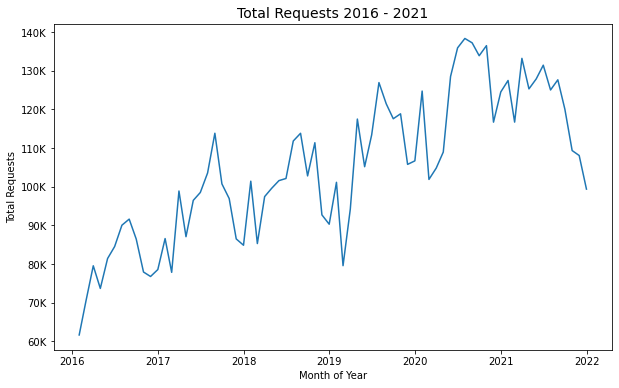

In [14]:
# Plot the montly requests number

fig, ax = plt.subplots(figsize=(10, 6))  
plt.plot(df1)
f = lambda x, pos: f'{x/10**3:,.0f}K'
ax.yaxis.set_major_formatter(FuncFormatter(f))
plt.title('Total Requests 2016 - 2021',fontsize=14)
plt.xlabel('Month of Year')
plt.ylabel('Total Requests')
#plt.grid()
plt.show()

In [15]:
df1.describe()

,RequestCount
count,72.000000
mean,104796.333333
std,18747.455387
min,61628.000000
25%,90216.250000
50%,103159.000000
75%,119142.500000
max,138331.000000


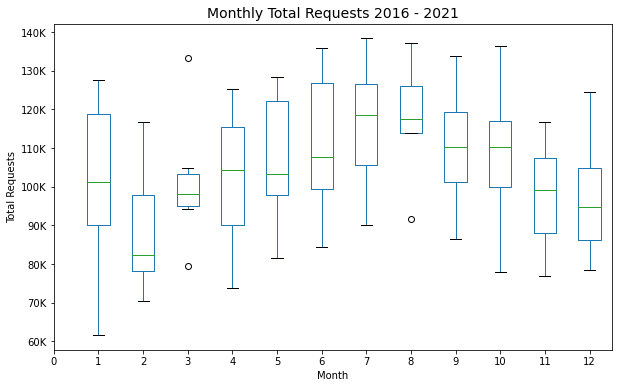

In [16]:
# Plot the montly requests number boxplot

fig, ax = plt.subplots(figsize=(10, 6))  
df1.groupby(lambda x: x.strftime("%m")).boxplot(subplots=False)
f = lambda x, pos: f'{x/10**3:,.0f}K'
ax.yaxis.set_major_formatter(FuncFormatter(f))
x = list(range(0,13))
xi = list(range(len(x)))
plt.xticks(xi, x)
plt.title('Monthly Total Requests 2016 - 2021',fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Requests')
plt.grid(b=None)

From the above boxplot, we see the the highest requests number is on July and August of each year. And the lowest requests number is on February. 

<h2>Stationarity</h2>

Check for stationarity. Stationarity means that the manner in which time series data changes is constant. A stationary time series will not have any trends or seasonal patterns. 

We will use the __Dickey Fuller test__ to check for stationarity in our data. This test will generate critical values and a p-value, which will allow us to accept or reject the null hypothesis that there is no stationarity. If we reject the null hypothesis, that means we accept the alternative, which states that there is stationarity.

In [17]:
#let’s calculate a seven-month rolling mean
rolling_mean = df1.rolling(7).mean()
rolling_std = df1.rolling(7).std()

Next, let’s overlay our time series with the seven-month rolling mean and seven-month rolling standard deviation. First, let’s make a Matplotlib plot of our time series:

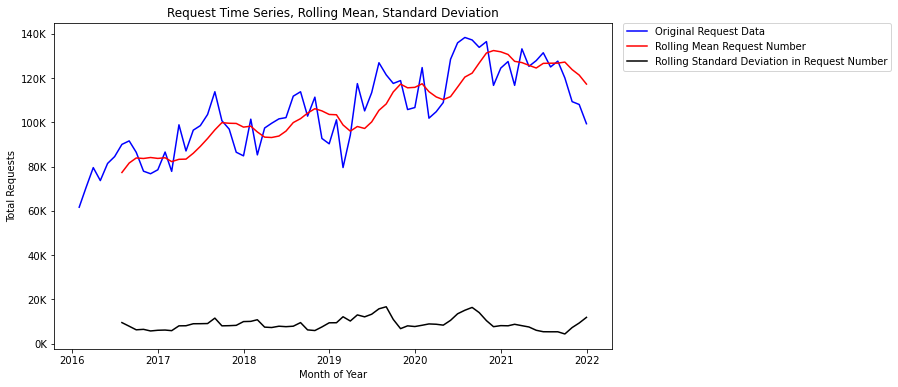

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))  
f = lambda x, pos: f'{x/10**3:,.0f}K'
ax.yaxis.set_major_formatter(FuncFormatter(f))
plt.plot(df1, color="blue",label="Original Request Data")
plt.plot(rolling_mean, color="red", label="Rolling Mean Request Number")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Request Number")
plt.title("Request Time Series, Rolling Mean, Standard Deviation")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Month of Year')
plt.ylabel('Total Requests')
plt.show()

To know more about the time series stationarity, we can perform the ADfuller test, a test based on hypothesis, where if the p-value is less than 0.05, then we can consider the time series is stationary, and if the P-value is greater than 0.05, then the time series is non-stationary.

In [19]:
adft = adfuller(df1,autolag="AIC")

In [20]:
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

      Values                       Metric
0  -1.487859              Test Statistics
1   0.539508                      p-value
2  12.000000             No. of lags used
3  59.000000  Number of observations used
4  -3.546395          critical value (1%)
5  -2.911939          critical value (5%)
6  -2.593652         critical value (10%)


We can see that our data is non stationary from the fact that our p-value is a close to 5 percent.  We can also draw these conclusions from inspecting the data, as we see a clear, increasing trend in the number of passengers.

<h2>Autocorrelation</h2>

We will check for autocorrelation. This is a measure of how correlated time series data is at a given point in time with past values. For example, if our request data has strong autocorrelation, we can assume that high request numbers today suggest a strong likelihood that they will be high tomorrow as well.

In [21]:
autocorrelation_lag1 = df1['RequestCount'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)
autocorrelation_lag3 = df1['RequestCount'].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)
autocorrelation_lag6 = df1['RequestCount'].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)
autocorrelation_lag9 = df1['RequestCount'].autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9)

One Month Lag:  0.8445983318151342
Three Month Lag:  0.7404599374268748
Six Month Lag:  0.5424131179496651
Nine Month Lag:  0.6556820381296685


We see that, with a nine-month and six-month lag, the data is moderately autocorrelated. On the other hand, with one-month and 3-month lag, the data is strongly autocorrelated. This is further illustration of the short- and long-term trends in the data.

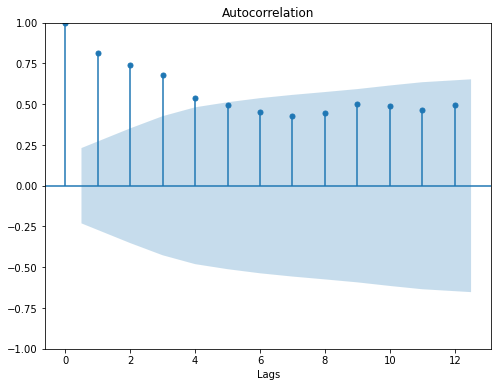

In [22]:
# Plot the autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
rcParams['figure.figsize'] = 8, 6
plot_acf(df1['RequestCount'], lags=12)
plt.xlabel('Lags')
plt.show()

The blue shaded region is the confidence interval with a default value of α = 0.05. Anything within this range represents a value that has no significant correlation with the most recent value for the request count. Therefore, values beyond the 5th months have no significant predictive power on the current request count.

C:\Miniconda\envs\IBM_DS\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


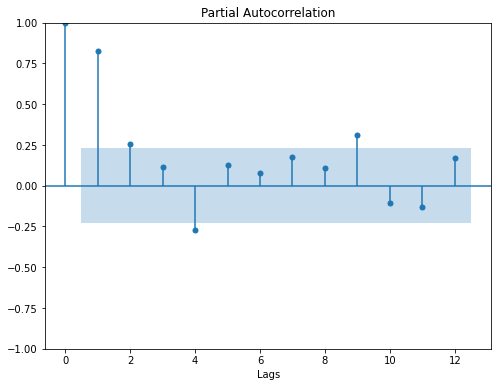

In [23]:
from statsmodels.graphics.tsaplots import plot_pacf
rcParams['figure.figsize'] = 8, 6
plot_pacf(df1['RequestCount'], lags=12)
plt.xlabel('Lags')
plt.show()

<h2>Decomposition</h2>

Trend decomposition is another useful way to visualize the trends in time series data. To proceed, let’s import seasonal_decompose from the statsmodels package:

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

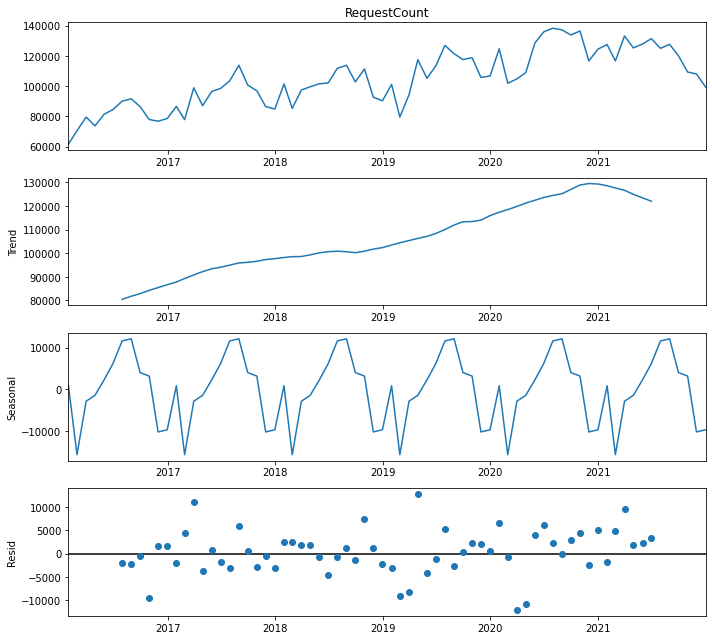

In [25]:
decompose = seasonal_decompose(df1['RequestCount'],model='additive')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 9
decompose.plot()
plt.show()

From this plot, __we can clearly see the increasing trend in number of requests up until 2021, then decreasing trend__. A 12-month seasonal pattern is visible.

Note that Resid of residual is what's left over after trends and seasonality are removed, i.e., it is the randomness or irregularity.

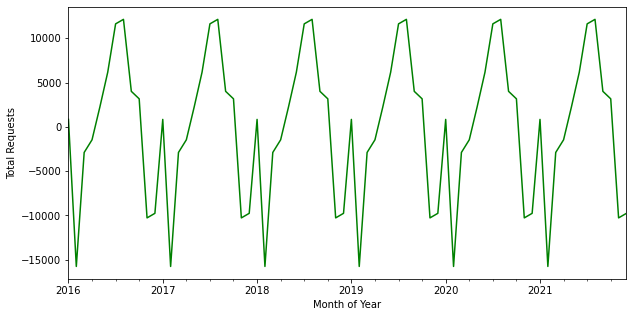

In [26]:
#We can easily see the seasonality effect in our time series. In the image below, 
#we have extracted the seasonality from the time series.

fig, ax = plt.subplots(figsize=(10, 5))  
seasonality=decompose.seasonal
seasonality.plot(color='green')
plt.xlabel('Month of Year')
plt.ylabel('Total Requests')
plt.show()

<h2>Forecasting</h2>

Forecasting allows us to predict future values in a time series given current and past data. Here, we will use the ARIMA method to forecast the number of requests, which allows us to forecast future values in terms of a linear combination of past values. We will use the auto_arima package, which will allow us to forgo the time consuming process of hyperparameter tuning.

First, let’s split our data for training and testing and visualize the split:

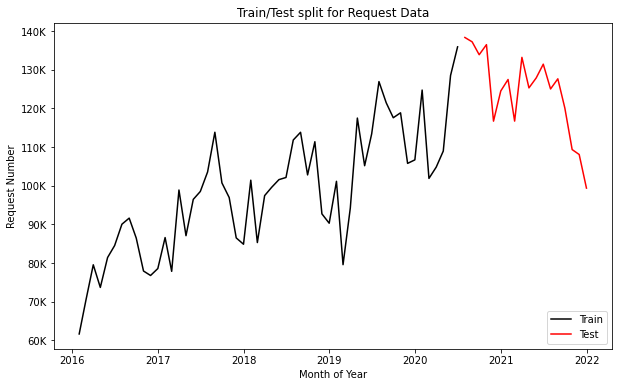

In [27]:
# We split the date into about 75% training and 25% testing
df1['Date'] = df1.index
train = df1[df1['Date'] < pd.to_datetime("2020-7", format='%Y-%m')]
del train['Date']
test = df1[df1['Date'] >= pd.to_datetime("2020-7", format='%Y-%m')]
del test['Date']
fig, ax = plt.subplots(figsize=(10, 6))  
f = lambda x, pos: f'{x/10**3:,.0f}K'
ax.yaxis.set_major_formatter(FuncFormatter(f))
plt.plot(train, color = "black", label="Train")
plt.plot(test, color = "red", label="Test")
plt.title("Train/Test split for Request Data")
plt.ylabel("Request Number")
plt.xlabel('Month of Year')
plt.legend(loc='lower right')
#plt.grid()
plt.show()

In [28]:
#import auto_arima from the pdmarima package, train our model and generate predictions
from pmdarima.arima import auto_arima
model = auto_arima(train, trace = True, seasonal=True, m=12)
forecast, con_int = model.predict(n_periods=len(test), return_conf_int=True, alpha=0.05) #95% conf
forecast = pd.DataFrame(forecast, index = test.index, columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=882.196, Time=0.75 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=880.363, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=878.144, Time=0.14 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=877.475, Time=0.09 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=920.064, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=876.467, Time=0.03 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=877.731, Time=0.09 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=879.114, Time=0.13 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=879.201, Time=0.05 sec
 ARIMA(0,0,2)(0,1,0)[12] intercept   : AIC=878.089, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=876.893, Time=0.03 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=880.083, Time=0.09 sec
 ARIMA(0,0,1)(0,1,0)[12]             : AIC=902.248, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,1,0)[12] intercept
Total fit time: 1.558 seconds


In [29]:
# See the model
model

ARIMA(order=(0, 0, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True)

In [30]:
# See the confidence interval
cf= pd.DataFrame(con_int)
cf

,0,1
0,123149.314101,154734.989496
1,114865.590447,147878.944516
2,111000.590447,144013.944516
3,112280.590447,145293.944516
4,99195.590447,132208.944516
5,100105.590447,133118.944516
6,118161.590447,151174.944516
7,95306.590447,128319.944516
8,98233.590447,131246.944516
9,102382.590447,135395.944516


In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   54
Model:             SARIMAX(0, 0, 1)x(0, 1, [], 12)   Log Likelihood                -435.234
Date:                             Thu, 21 Jul 2022   AIC                            876.467
Time:                                     09:18:27   BIC                            881.680
Sample:                                          0   HQIC                           878.378
                                              - 54                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9944.2675   1801.325      5.521      0.000    6413.735    1.35e+04
ma.L1          0.3040      0.149      2.046      0.041       0.013       0.595
sigma2      6.493e+07      0.007   8.85e+09      0.000    6.49e+07    6.49e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.16
Prob(Q):                              0.86   Prob(JB):                         0.92
Heteroskedasticity (H):               2.80   Skew:                            -0.03
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.24e+26. Standard errors may be unstable.
"""

In [32]:
forecast

,Prediction
Date,
2020-07-31,138942.151798
2020-08-31,131372.267481
2020-09-30,127507.267481
2020-10-31,128787.267481
2020-11-30,115702.267481
2020-12-31,116612.267481
2021-01-31,134668.267481
2021-02-28,111813.267481
2021-03-31,114740.267481


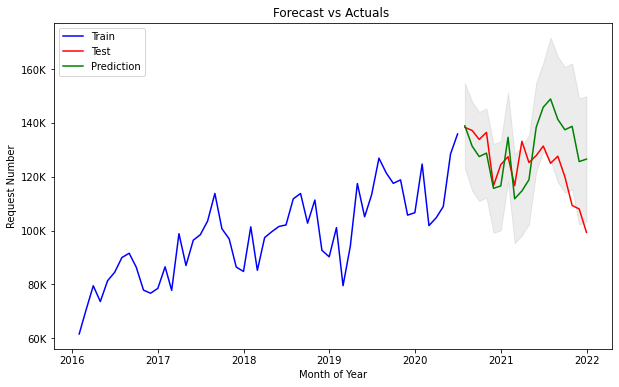

In [33]:
# Plot the forecast vs Actuals (test data)
fig, ax = plt.subplots(figsize=(10, 6))  
f = lambda x, pos: f'{x/10**3:,.0f}K'
ax.yaxis.set_major_formatter(FuncFormatter(f))
plt.plot(train, color = "blue", label="Train")
plt.plot(test, color = "red", label="Test")
plt.plot(forecast, color = "green", label="Prediction")
ax.fill_between(forecast.index,
                cf[0],
                cf[1],color='grey',alpha=.15)
plt.title("Forecast vs Actuals ")
plt.ylabel("Request Number")
plt.xlabel('Month of Year')
plt.legend(loc='upper left')
#plt.grid()
plt.show()

We see that the values of the forecast is pretty close to the actual data up until eary 2021. Afterwards, the difference between the forecast and the actual data becomes large since the forecast assumes that the requests number will follow the increasing trend that it sees in the training data.

In [34]:
residuals = [test.RequestCount[i]-forecast.Prediction[i] for i in range(len(forecast))]
residuals = pd.DataFrame(residuals)
residuals['Date'] = forecast.index
residuals.index = residuals['Date']
del residuals['Date']

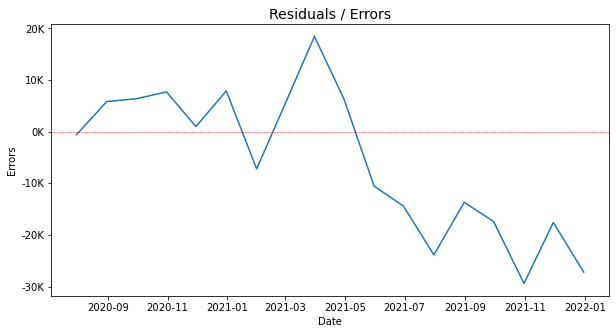

In [35]:
# Plot of residuals / errors
fig, ax = plt.subplots(figsize=(10, 5))  
plt.plot(residuals)
f = lambda x, pos: f'{x/10**3:,.0f}K'
ax.yaxis.set_major_formatter(FuncFormatter(f))
plt.title('Residuals / Errors',fontsize=14)
plt.xlabel('Date')
plt.ylabel('Errors')
plt.axhline(y=0, color='r', linestyle='--', lw = 0.5)
plt.show()

In [36]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(model.resid(), lags=[3], return_df=True)

,lb_stat,lb_pvalue
3,105.820741,8.701437e-23


The test statistic of the test is 105.82 and the p-value of the test is 8.701437e-23, which is much less than 0.05. Thus, we reject the null hypothesis of the test and conclude that the residuals are not independent.

In [37]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rmse)

RMSE:  14808.684132009666


In [38]:
monthly_range = []
for i in range(len(df1)-1):
    range_i = abs(df1['RequestCount'][i+1] - df1['RequestCount'][i])
    monthly_range.append(range_i)
min(monthly_range), max(monthly_range)

(552, 23266)

Root Mean Square Error (RMSE) tells us that our model was capable of forecast the average monthly total request in the test set within 14,808.68 of the actual total request. Our month by month total requests range from around 552 to over 23266. So, it seems the model is not that bad, but not good either.

In [39]:
from pmdarima.metrics import smape
smape(test,forecast)

9.723225502834651

Running a model diagnosis is essential in Time Series Forecasting to investigate any unusual behavior in the model.

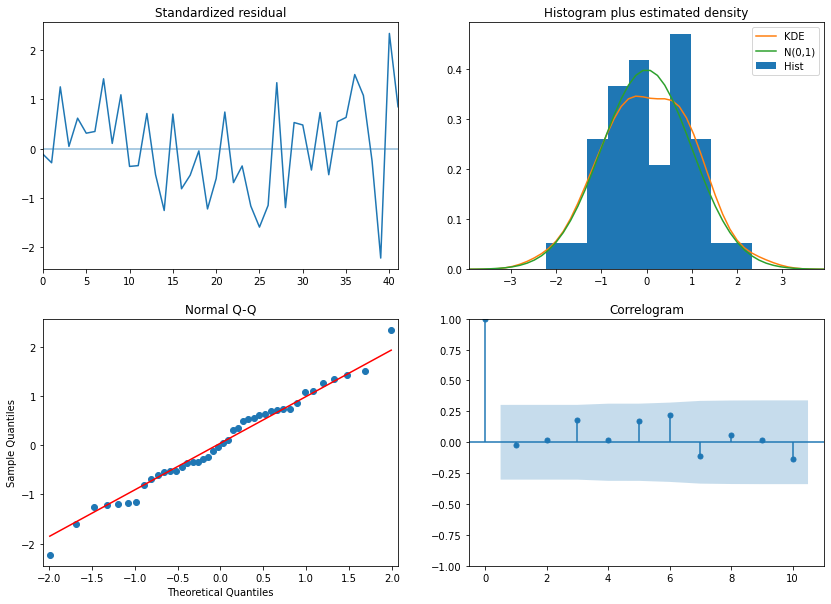

In [40]:
model.plot_diagnostics(figsize=(14,10))
plt.show()

Using this model now, we can predict the future values too. We will make forecast until the end of 2023.

In [41]:
# Create a dataframe where each row have montly timestamp from early 2022 up until December 2023, 
# and an empty RequestCount 

from pandas.tseries.offsets import DateOffset
pred_date=[df1.index[-1]+ DateOffset(months=x)for x in range(0,25)]
df2 = df1.copy()
del df2['Date']
pred_date=pd.DataFrame(index=pred_date[1:],columns=df2.columns)
pred_date.head()

,RequestCount
2022-01-31,NaN
2022-02-28,NaN
2022-03-31,NaN
2022-04-30,NaN
2022-05-31,NaN


In [42]:
# Fill the empty RequestCount with the prediction
pred_date['RequestCount'], con_int2 = model.predict(n_periods=len(pred_date), return_conf_int=True, alpha=0.05)  
pred_date

,RequestCount
2022-01-31,138942.151798
2022-02-28,131372.267481
2022-03-31,127507.267481
2022-04-30,128787.267481
2022-05-31,115702.267481
2022-06-30,116612.267481
2022-07-31,134668.267481
2022-08-31,111813.267481
2022-09-30,114740.267481
2022-10-31,118889.267481


In [43]:
final_df = pd.concat([df2,pred_date])
final_df.shape

(96, 1)

In [44]:
# Name the confidence interval of the new prediction as cf2
cf2= pd.DataFrame(con_int2)

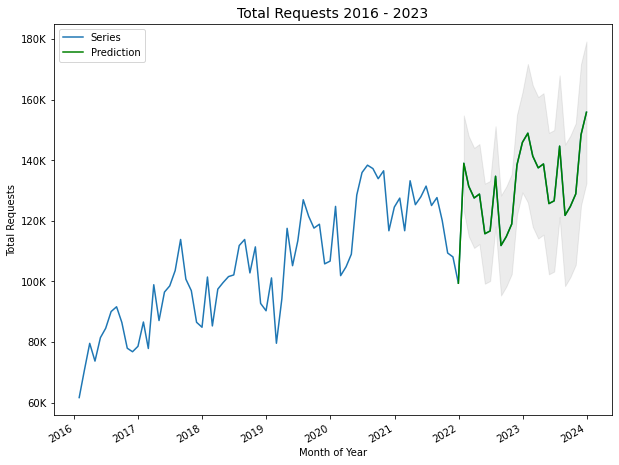

In [45]:
# Plot the predition together with the actual data

fig, ax = plt.subplots(figsize=(10, 8))  
s = plt.plot(final_df)
f = lambda x, pos: f'{x/10**3:,.0f}K'
ax.yaxis.set_major_formatter(FuncFormatter(f))
p = final_df.loc[final_df.index >= pd.to_datetime("2021-12", format='%Y-%m'), 'RequestCount'].plot(color='g', ax=ax)
ax.fill_between(pred_date.index, cf2[0], cf2[1],color='grey',alpha=.15)
plt.title('Total Requests 2016 - 2023',fontsize=14)
plt.xlabel('Month of Year')
plt.ylabel('Total Requests')
plt.gca().legend(('Series','Prediction'), loc='upper left')
#plt.grid()
plt.show()

<h2>Summary</h2>

From the decomposition plot of 2016 - 2021 311-data, we see that there is a steady increasing trend from 2016 until the end of 2020. Since the begining of 2021, the requests number starts to decrease. We also see the seasonal trend from the decompostionn plot.

In order to make a montly prediction of the 311 requests number, we split the 2016 - 2021 311-data into 75% training and 25% testing. We used Auto Arima to make the prediction. However, since the model assumed that the trend of the requests number would steadily increase, the gap (error) between the testing data and the prediction grew bigger after early 2021.

To make a better predition of the requests number, probably we can try different time forecasting library instead of Auto Arima. Also, maybe we can add some features to make the model adapts to the decresing trend that we see since early 2021. 